# Figure for scientific publication

Making figures for scientific reports with several subfigures can result in quite messy code. This is why I use functions defining individual subfigures and combine those in a grid.

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
plt.rc('text.latex', preamble = r"\usepackage{txfonts}")
plt.rc('text.latex', preamble = r"\usepackage{upgreek}")
plt.rc('text', usetex = True)
plt.rc('font', family='sans-serif')
plt.rc('font', size = 16)

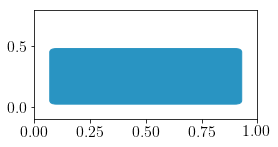

In [91]:
def sub1(ax):
    import matplotlib.patches as mpatches
    plt.xlim([0,1])
    plt.ylim([-0.1,0.8])
#     plt.axis("off")
#     plt.gca().xaxis.set_major_locator(plt.NullLocator())
#     plt.gca().yaxis.set_major_locator(plt.NullLocator())
#     #draw components
    patches = []
    bncolor= (41/255,148/255,194/255)
    rectangle = mpatches.FancyBboxPatch([0.1, 0.05],0.8, 0.4, boxstyle='round',mutation_scale=0.1,fc=bncolor,ec=bncolor,zorder=3)
    patches.append(rectangle)
#     x0= 0
#     y0 = 0
#     scaleX=0.25
#     scaleY =0.2
#     width = 3.5*scaleX
#     cwidth = 0.1*scaleX
#     tgwidth=0.3*scaleX
#     height =2*scaleY
#     sgwidth=0.2*scaleX
#     chwidth=0.05*scaleX
#     ms=0.1
#     patches = []

#     rectangle = mpatches.FancyBboxPatch((x0,y0),cwidth,height,boxstyle='round',mutation_scale=ms,fc= 'orange',ec="none",\
#                                        transform=ax.transAxes)
#     patches.append(rectangle)
#     rectangle = mpatches.FancyBboxPatch((x0+width-cwidth,y0),cwidth,height,boxstyle='round',mutation_scale=ms,\
#                                         fc= 'orange',ec="none",transform=ax.transAxes)
#     patches.append(rectangle)
#     plt.text(x0+cwidth*0.5,y0+height*0.5,'S',horizontalalignment='center',verticalalignment='center',fontsize=11,\
#              transform=ax.transAxes)
#     plt.text(x0+width-cwidth*0.5,y0+height*0.5,'D',horizontalalignment='center',verticalalignment='center',fontsize=11,\
#             transform=ax.transAxes)
#     rectangle = mpatches.Rectangle([0,-0.05],1,0.1,fc='k',ec='k',zorder=3)
#     patches.append(rectangle)
#     rectangle = mpatches.Rectangle([0.0,0.3],0.4,0.2,fc='orange',ec='orange',zorder=5)
#     patches.append(rectangle)
#     rectangle = mpatches.Rectangle([0.6,0.3],0.4,0.2,fc='orange',ec='orange',zorder=5)
#     patches.append(rectangle)
#     rectangle = mpatches.Rectangle([0,0.3],1,0.4,fc='0.7',ec='0.7',zorder=4)
#     patches.append(rectangle)
#     rectangle = mpatches.Rectangle([0,0.7],1,0.1,fc='orange',ec='orange',zorder=1)
#     patches.append(rectangle)
#     ellipse = mpatches.Ellipse([0.5,0.7],0.3,0.2,fc='orange',ec='orange',zorder=4)
#     patches.append(ellipse)
    for p in patches:
        ax.add_patch(p)
#     plt.plot([0.1,0.9],[0.175,0.175],color='k',linewidth=2,zorder=5)
    
#     fs = 16
#     plt.text(0.5,0.65,'CH',fontsize=fs,zorder=8,horizontalalignment='center')
#     plt.text(0.2,0.36,'SG',fontsize=fs,zorder=8,horizontalalignment='center')
#     plt.text(0.8,0.36,'SG',fontsize=fs,zorder=8,horizontalalignment='center')
#     plt.text(0.2,0.55,r'Al$_\mathsf{2}$O$_\mathsf{3}$',zorder=8,horizontalalignment='center')
#     plt.text(0.24,0.08,r'$\uparrow$',fontsize=fs,color='w',zorder=8,horizontalalignment='center')
#     plt.text(0.5,0.075,r'graphene layer',fontsize=fs,color='w',zorder=8,horizontalalignment='center')
#     plt.text(0.5,-0.05,'BG',fontsize=fs,color='w',zorder=8,horizontalalignment='center')
#     plt.text(0.5,0.2,'boron nitride',fontsize=fs,color='w',zorder=8,horizontalalignment='center')



    
fig = plt.figure()
fig.set_size_inches(4,2)
ax = fig.add_subplot(111)
sub1(ax)

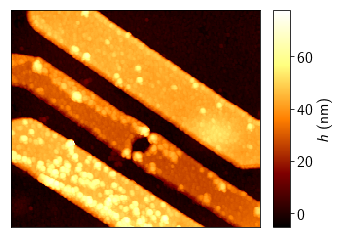

In [93]:
def sub2(ax):
    import AFM
    fileName = 'splitgates.006'
    channels, extent, extentUnit = AFM.createChannelDict(fileName)
    im = plt.pcolormesh(channels['Height Sensor'], cmap=plt.cm.afmhot)
    plt.xticks([])
    plt.yticks([])
    return(im)

def addCbar2(ax, im):
    cbar = fig.colorbar(im, cax = ax)
    ax.set_ylabel(r'\textit{h} (nm)')
    cticks = np.linspace(0, 60, 4)
    cbar.set_ticks(cticks)
    cbar.set_ticklabels(cticks.astype(int))

fig = plt.figure()
fig.set_size_inches(5,4)
gs = gridspec.GridSpec(1, 2, width_ratios=[15, 1],wspace=0.1)

ax1 = plt.subplot(gs[0])
im = sub2(ax1)
ax2 = plt.subplot(gs[1])
addCbar2(ax2, im)

# saveTo = os.path.join(folder,'stack21_qpc','export')
# plt.savefig(os.path.join(saveTo,'afm.png'),dpi=500,bbox_inches='tight')

In [80]:
#generate some random data
def gauss(x,y,x0,y0,sigma):
    return(np.exp(-((x-x0)**2+(y-y0)**2)/sigma**2))
   
x = np.linspace(0,1,101)
xx,yy = np.meshgrid(x,x)
zz = 5*(gauss(xx,yy,0.2,0.3,0.1)+gauss(xx,yy,0.5,0.7,0.3)+gauss(xx,yy,0.8,0.2,0.2))

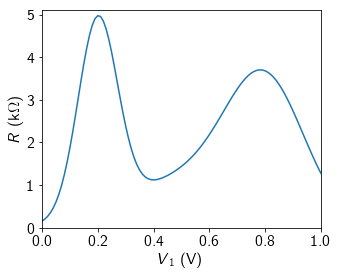

In [81]:
def sub3(ax):
    idx = 33
    plt.plot(xx[idx,:],zz[idx,:])
    plt.xlabel(r'\textit{V}$_\mathsf{1}$ (V)')
    plt.ylabel(r'\textit{R} (k$\Omega$)')
    plt.xlim([0, 1])
    plt.ylim([0, 5.1])
    xticks = np.linspace(0,1,6)
    plt.xticks(xticks,xticks)
    yticks = np.linspace(0,5,6)
    plt.yticks(yticks,yticks.astype(int))
    return(idx)

fig = plt.figure()    
fig.set_size_inches(5,4)
ax = fig.add_subplot(111)
idx = sub3(ax)

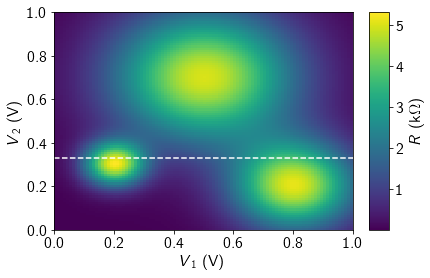

In [83]:
def sub4(ax,idx):
    im = plt.pcolormesh(xx,yy,zz)
    plt.xlabel(r'\textit{V}$_\mathsf{1}$ (V)')
    plt.ylabel(r'\textit{V}$_\mathsf{2}$ (V)')
    xticks = np.linspace(0,1,6)
    yticks = xticks
    plt.xticks(xticks,xticks)
    plt.yticks(yticks,yticks)
    plt.axhline(x[idx], color = 'w', linestyle = '--')
    return(im)

def addCbar4(ax, im):
    cbar = fig.colorbar(im, cax = ax)
    ax.set_ylabel(r'\textit{R} (k$\Omega$)')
    cticks = np.linspace(1, 5, 5)
    cbar.set_ticks(cticks)
    cbar.set_ticklabels(cticks.astype(int))
    
fig.set_size_inches(5,4)
gs = gridspec.GridSpec(1, 2, width_ratios=[15, 1],wspace=0.1)
ax1 = plt.subplot(gs[0])
im = sub4(ax1,idx)
ax2 = plt.subplot(gs[1])
addCbar4(ax2, im)

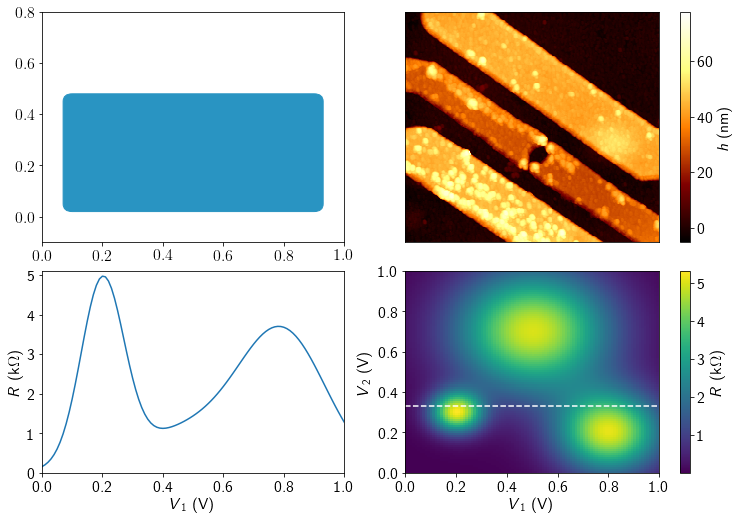

In [112]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
fig.set_size_inches(12,8)



gs1 = gridspec.GridSpec(1, 1)

gs1.update(top=0.9,bottom=0.5,left=0.1,right=0.45)
ax1 = plt.subplot(gs1[:, :])
sub1(ax1)

gs2 = gridspec.GridSpec(1,10)
gs2.update(top=0.9,bottom=0.5,left = 0.52,right=0.85,wspace=2)
ax2a = plt.subplot(gs2[0, :9])
im = sub2(ax2a)
ax2b = plt.subplot(gs2[0, 9:])
addCbar2(ax2b,im)

gs3 = gridspec.GridSpec(1,8)
gs3.update(top=0.45,bottom=0.1,left=0.1,right=0.45,wspace=1)
ax3 = plt.subplot(gs3[:,:])
idx = sub3(ax3)

gs4 = gridspec.GridSpec(1,10)
gs4.update(top=0.45,bottom=0.1,left = 0.52,right=0.85,wspace=2)
ax4a = plt.subplot(gs4[0, :9])
im = sub4(ax4a,idx)
ax4b = plt.subplot(gs4[0, 9:])
addCbar4(ax4b,im)